#  Hands-on-session1 (Querying data from materials databases)**

# **Necessary Libraries**

In [1]:
!pip install matminer[citrine]
!pip install pyyaml
!pip install mp_api
!pip install pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.

# **Reading data from the excel or csv file**

In [39]:
## Loading sample data file of "california_housing_train.csv" from folder "sample_data" as a dataframe using pandas
## To see the manual, type "?pd" or "?pd.read_csv" after importing pandas
## The detailed explanation can be found in "https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html"
import pandas as pd

file_path = "/content/sample_data/california_housing_train.csv"
df = pd.read_csv(file_path)

In [ ]:
## Loading sample data file of "california_housing_train.csv" from folder "sample_data" as a dataframe using pandas
## To see the manual, type "?pd" or "?pd.read_csv" after importing pandas
## The detailed explanation can be found in "https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html"
import pandas as pd

file_path = "XXXXXX"
df = pd.XXX_csv(XXXX)

In [30]:
## Checking the loading dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
## Checking the loading dataframe
df.XXXX()

In [ ]:
# Summary statistics of the DataFrame
# To see what you can do with this class, just put "." and wait to see the list of available functions and properties
df.XXXX()

In [28]:
# Summary statistics of the DataFrame
# To see what you can do with this class, just put "." and wait to see the list of available functions and properties
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
## tuple representing the dimensionality of the DataFrame
df.shape

(17000, 9)

In [ ]:
## tuple representing the dimensionality of the DataFrame
df.XXXX

17000

In [34]:
## Confirm axis labels to see features
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
## Confirm axis labels to see features
df.XXXX

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [41]:
## Sorting the houses' population over 1000
df_pop = df[df['population'] > 1000]
df_pop.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,-119.399261,35.417573,26.487523,3446.660744,707.732887,1929.784057,661.815031,3.820634,203002.966793
std,1.951619,2.042442,12.035606,2426.788051,457.178277,1225.653921,413.395135,1.758795,107875.631053
min,-124.300000,32.540000,2.000000,118.000000,17.000000,1001.000000,13.000000,0.677500,22500.000000
25%,-121.520000,33.920000,17.000000,2128.000000,440.000000,1245.000000,422.000000,2.576650,124350.000000
50%,-118.400000,34.180000,26.000000,2830.000000,579.000000,1568.000000,546.000000,3.525000,178500.000000
75%,-117.950000,37.500000,35.000000,3895.000000,806.000000,2146.000000,750.000000,4.677350,257100.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
## Sorting the houses' population over 1000
df_pop = df[df['XXXX'] > XXXX]
df_pop.describe()

In [42]:
## Sorting with the condition of population over 1000 & total bedrooms below 500
df_pop_bed = df[(df['population'] > 1000) & (df['total_bedrooms'] < 500)]
df_pop_bed.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000
mean,-119.339553,35.349840,30.204787,2033.755053,397.941223,1299.090957,385.083245,3.849400,185901.993085
std,1.868743,1.964616,11.336990,599.354618,68.109137,322.180191,66.361684,1.852961,102136.339012
min,-124.230000,32.540000,3.000000,118.000000,17.000000,1001.000000,13.000000,0.752600,38800.000000
25%,-121.320000,33.930000,21.000000,1597.750000,353.000000,1100.750000,342.000000,2.481050,112275.000000
50%,-118.350000,34.160000,32.000000,2004.500000,407.000000,1224.000000,390.000000,3.571400,163200.000000
75%,-117.990000,37.350000,37.000000,2421.000000,453.000000,1409.000000,434.000000,4.758275,233100.000000
max,-114.600000,41.810000,52.000000,4078.000000,499.000000,8733.000000,547.000000,15.000100,500001.000000


In [ ]:
## Sorting with the condition of population over 1000 & total bedrooms below 500
df_pop_bed = df[(df['XXXX'] > XXX) & (df['XXXX'] < XXX)]
df_pop_bed.describe()

In [43]:
## Generate a new column for the data satifying specific conditions of population over 3000
df['High_population'] = df['population'] >= 3000
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,High_population
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,False
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,False
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,False
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,False
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,False
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,False
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,False
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,False
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,True
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,False


In [ ]:
## Generate a new column for the data satifying specific conditions of population over 3000
df['High_population'] = df['XXXXX'] >= XXXX
df.head(10)

In [44]:
## Save to excel file
df.to_csv("new_df.csv")

In [ ]:
## Save to excel file
df.XXXXX("new_df.csv")

# **Materials Project**

**Getting Data**

*Revised from Joseph Montoya's notebook*

This notebook demonstrates a few basic examples from matminer's data retrieval features. Matminer supports data retrieval from the following sources.

*   Materials Project (https://materialsproject.org/)

This notebook was last updated 11/15/18 for version 0.4.5 of matminer.

Each resource has a corresponding object in matminer designed for retrieving data and preprocessing it into a pandas dataframe. In addition, matminer can also access and aggregate data from your own mongo database, if you have one.


**Data retrieval**

The materials project data retrieval tool, matminer.data_retrieval.retrieve_MP.MPDataRetrieval is initialized using an api_key that can be found on your personal dashboard page on materialsproject.org if you've created an account. If you've set your api key via pymatgen (e.g. pmg config --add PMG_MAPI_KEY YOUR_API_KEY_HERE), the data retrieval tool may be initialized without an input argument.

**We need our own MP API Key**

In [51]:
## Materials Project API client: https://docs.materialsproject.org/downloading-data/using-the-api/getting-started
## Loading module of MP API client
from mp_api.client import MPRester
import pandas as pd

In [52]:
?MPRester

In [68]:
## Put your own API key
my_api_key = "yJqA7NuM0dhvCgV4dUuvv3eb1r3YST2Z"
mpr = MPRester(my_api_key)

In [ ]:
## Put your own API key. You can register https://next-gen.materialsproject.org/ and get yours in "API" tab.
my_api_key = "___API Key___"
mpr = MPRester(XXXX)

In [54]:
## See the summary of available fields for crystalline materials
## How about molecular materials?
list_of_available_fields = mpr.materials.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

<ipython-input-54-6c12413ab4e7>:1: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  list_of_available_fields = mpr.summary.available_fields


In [ ]:
## See the summary of available fields for crystalline materials
## How about molecular materials?
list_of_available_fields = mpr.XXXXX.XXXX
print(list_of_available_fields)

In [72]:
## Querying Data from MP (https://docs.materialsproject.org/downloading-data/using-the-api/querying-data)
## Load data for target properties
docs = mpr.materials.summary.search(formula="LiCoO2", fields=list_of_available_fields)
docs

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', run_id=None, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 44, 5, 61000), license='BY-C'),
 nsites=16,
 elements=[Element Co, Element Li, Element O],
 nelements=3,
 composition=Composition('Li4 Co4 O8'),
 composition_reduced=Composition('Li1 Co1 O2'),
 formula_pretty='LiCoO2',
 formula_anonymous='ABC2',
 chemsys='Co-Li-O',
 volume=138.97763486934423,
 density=4.6776427564172245,
 density_atomic=8.686102179334014,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='C2/m', number=12, point_group='2/m', symprec=0.1, version='2.0.2'),
 property_name='summary',
 material_id=MPID(mp-1097885),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2023, 11, 22, 19, 44, 5, 61000),
 origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1774421), last_updated=datetime.datetime(2020, 11, 10, 1, 26, 55, 76600

In [ ]:
## Querying Data from MP (https://docs.materialsproject.org/downloading-data/using-the-api/querying-data)
## Load data for target properties
docs = mpr.materials.summary.XXXXX(formula="LiCoO2", fields=XXXXX)
docs

In [75]:
## Transforming the data list into dictionary type and then dataframe
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
df_full.head(10)

,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,volume,density,density_atomic,symmetry,property_name,material_id,deprecated,deprecation_reasons,last_updated,origins,warnings,structure,task_ids,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,decomposes_to,xas,grain_boundaries,band_gap,cbm,vbm,efermi,is_gap_direct,is_metal,es_source_calc_id,bandstructure,dos,dos_energy_up,dos_energy_down,is_magnetic,ordering,total_magnetization,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,num_unique_magnetic_sites,types_of_magnetic_species,bulk_modulus,shear_modulus,universal_anisotropy,homogeneous_poisson,e_total,e_ionic,e_electronic,n,e_ij_max,weighted_surface_energy_EV_PER_ANG2,weighted_surface_energy,weighted_work_function,surface_anisotropy,shape_factor,has_reconstructed,possible_species,has_props,theoretical,database_IDs,fields_not_requested
0,"{'emmet_version': '0.72.20', 'pymatgen_version...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,138.977635,4.677643,8.686102,"{'crystal_system': 'Monoclinic', 'symbol': 'C2...",summary,mp-1097885,False,None,2023-11-22 19:44:05.061000,"[{'name': 'structure', 'task_id': 'mp-1774421'...",[],"{'@module': 'pymatgen.core.structure', '@class...","[mp-1774421, mp-1097885]",-5.683789,-6.436789,-1.700072,0.043437,False,NaN,"[{'material_id': 'mp-22526', 'formula': 'Li1 C...","[{'edge': 'K', 'absorbing_element': 'Co', 'spe...",None,2.0128,4.1977,2.1849,2.185011,False,False,None,None,None,None,None,False,NM,4.566800e-03,3.285996e-05,1.141700e-03,0,0,[],None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,{},[]
1,"{'emmet_version': '0.72.20', 'pymatgen_version...",4,"[Co, Li, O]",3,"{'Li': 1.0, 'Co': 1.0, 'O': 2.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,31.733697,5.121431,7.933424,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m...",summary,mp-22526,False,None,2023-11-22 19:44:08.689000,"[{'name': 'structure', 'task_id': 'mp-2206412'...",[],"{'@module': 'pymatgen.core.structure', '@class...","[mp-2659573, mp-2659647, mp-2724050, mp-668942...",-8.663256,-6.480225,-1.743508,0.000000,True,-0.094915,None,"[{'edge': 'K', 'absorbing_element': 'O', 'spec...",None,0.6623,4.4885,3.8262,3.956244,False,False,None,{'setyawan_curtarolo': {'task_id': 'mp-818954'...,"{'total': {'1': {'task_id': 'mp-2253507', 'ban...",None,None,False,NM,0.000000e+00,0.000000e+00,0.000000e+00,0,0,[],None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,"[O2-, Co3+, Li+]","{'materials': True, 'thermo': True, 'xas': Fal...",False,"{'icsd': ['icsd-182346', 'icsd-193442', 'icsd-...",[]
2,"{'emmet_version': '0.72.20', 'pymatgen_version...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,126.287508,5.147680,7.892969,"{'crystal_system': 'Cubic', 'symbol': 'Fd-3m',...",summary,mp-849273,False,None,2023-11-22 19:45:00.149000,"[{'name': 'structure', 'task_id': 'mp-2015187'...",[],"{'@module': 'pymatgen.core.structure', '@class...","[mp-1442744, mp-1096831, mp-1443860, mp-178876...",-8.662660,-6.479629,-1.742912,0.000596,False,NaN,"[{'material_id': 'mp-22526', 'formula': 'Li1 C...","[{'edge': 'K', 'absorbing_element': 'Co', 'spe...",None,0.0000,NaN,NaN,3.361729,False,True,None,None,None,None,None,False,NM,9.000000e-07,7.126596e-09,2.250000e-07,0,0,[],None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,"[Co3+, O2-, Li+]","{'materials': True, 'thermo': True, 'xas': Tru...",True,{},[]
3,"{'emmet_version': '0.72.20', 'pymatgen_version...",16,"[Co, Li, O]",3,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}","{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,ABC2,Co-Li-O,138.986978,4.677328,8.686686,"{'crystal_system': 'T

In [ ]:
## Transforming the data list into dictionary type and then dataframe
results = [doc.dict() for doc in docs]
df_full = pd.XXXXX(results)
df_full.head(10)

In [76]:
## In case you cannot load the data from MP, loading the data from excel file
df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_0")

In [73]:
## In case you cannot load the data from MP, loading the data from excel file
df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", XXXXX="example_0")

In [77]:
## Selecting the properties you want to use
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
df.head(10)

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
0,LiCoO2,mp-1097885,-1.700072,0.043437,2.0128
1,LiCoO2,mp-22526,-1.743508,0.000000,0.6623
2,LiCoO2,mp-849273,-1.742912,0.000596,0.0000
3,LiCoO2,mp-1404711,-1.697918,0.045590,1.9960
4,LiCoO2,mp-1222334,-1.532087,0.211422,0.0000
5,LiCoO2,mp-1340071,-0.229673,1.513835,0.0000
6,LiCoO2,mp-867664,-1.658004,0.085504,0.0000
7,LiCoO2,mp-753473,-1.650254,0.093254,0.8952
8,LiCoO2,mp-853240,-1.706609,0.036900,1.8839


In [ ]:
## Selecting the properties you want to use
df = df_full.XXXXX[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
df.head(10)

In [81]:
## https://docs.materialsproject.org/downloading-data/using-the-api/tips-for-large-downloads
## Before requesting data, use the has_props key to find which materials have data for your desired property.
## One source of wasted queries occurs when data is requested for materials that are either nonexistent or do not contain the property of interest.
## You should instead first determine what materials have the data you are looking for.
## For example, below is a query to get all of the material ID values for entries that have dielectric and density of states data:

docs = mpr.materials.summary.search(has_props=["dielectric", "dos"], fields=["material_id"])
docs[0]

Retrieving SummaryDoc documents:   0%|          | 0/6677 [00:00<?, ?it/s]

MPDataDoc<SummaryDoc>(
material_id=MPID(mp-28967),
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'ho

In [83]:
docs = mpr.materials.summary.search(has_props=["dielectric"], fields=["material_id"])
docs[0]

Retrieving SummaryDoc documents:   0%|          | 0/7277 [00:00<?, ?it/s]

MPDataDoc<SummaryDoc>(
material_id=MPID(mp-28967),
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'ho

In [82]:
## Load data for target properties
mat = mpr.materials.summary.search(material_ids="mp-28967")
mat

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', run_id=None, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 38, 17, 216000), license='BY-C'),
 nsites=14,
 elements=[Element Ba, Element Pd, Element S],
 nelements=3,
 composition=Composition('Ba2 Pd4 S8'),
 composition_reduced=Composition('Ba1 Pd2 S4'),
 formula_pretty='Ba(PdS2)2',
 formula_anonymous='AB2C4',
 chemsys='Ba-Pd-S',
 volume=316.34140399923814,
 density=5.022717317257348,
 density_atomic=22.595814571374152,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='P2_1/m', number=11, point_group='2/m', symprec=0.1, version='2.0.2'),
 property_name='summary',
 material_id=MPID(mp-28967),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2023, 11, 22, 19, 38, 17, 216000),
 origins=[PropertyOrigin(name='structure', task_id=MPID(mp-2016097), last_updated=datetime.datetime(2021, 3, 13, 5, 8, 45,

In [ ]:
## Load data for target properties
mat = mpr.materials.summary.search(XXXXX="mp-28967")
mat

In [85]:
## Sort the values in ascending order for a specific property (ex. formation_energy_per_atom)
sdf = df.sort_values(by="formation_energy_per_atom")
sdf.head(10)

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
1,LiCoO2,mp-22526,-1.743508,0.000000,0.6623
2,LiCoO2,mp-849273,-1.742912,0.000596,0.0000
8,LiCoO2,mp-853240,-1.706609,0.036900,1.8839
0,LiCoO2,mp-1097885,-1.700072,0.043437,2.0128
3,LiCoO2,mp-1404711,-1.697918,0.045590,1.9960
6,LiCoO2,mp-867664,-1.658004,0.085504,0.0000
7,LiCoO2,mp-753473,-1.650254,0.093254,0.8952
4,LiCoO2,mp-1222334,-1.532087,0.211422,0.0000
5,LiCoO2,mp-1340071,-0.229673,1.513835,0.0000


In [ ]:
## Sort the values in ascending order for a specific property (ex. formation_energy_per_atom)
sdf = df.XXXXX(by="XXXXX")
sdf.head(10)

In [86]:
## Load the same materials' data with different way
docs = mpr.materials.summary.search(chemsys="Li-Co-O", formula="ABC2", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
4,LiCoO2,mp-22526,-1.743508,0.000000,0.6623
6,LiCoO2,mp-849273,-1.742912,0.000596,0.0000
7,LiCoO2,mp-853240,-1.706609,0.036900,1.8839
0,LiCoO2,mp-1097885,-1.700072,0.043437,2.0128
3,LiCoO2,mp-1404711,-1.697918,0.045590,1.9960
8,LiCoO2,mp-867664,-1.658004,0.085504,0.0000
5,LiCoO2,mp-753473,-1.650254,0.093254,0.8952
1,LiCoO2,mp-1222334,-1.532087,0.211422,0.0000
2,LiCoO2,mp-1340071,-0.229673,1.513835,0.0000


In [ ]:
## Load the same materials' data with different way
docs = mpr.materials.summary.search(chemsys="X-X-X", formula="XXXX", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Getting a dataframe corresponding to the materials project is essentially equivalent to using the MPRester's query method.(see https://api.materialsproject.org/docs) The inputs are criteria and fields, a list of supported properties which to return. See the MAPI documentation (https://docs.materialsproject.org/downloading-data)

**Example 1: Get various properties of binary oxide materials with "A2O3" formula**


In [87]:
docs = mpr.materials.summary.search(chemsys="*-O", formula="A2B3", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_1")
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/374 [00:00<?, ?it/s]

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
180,Lu2O3,mp-1427,-4.069780,0.000000,4.0211
97,Tm2O3,mp-1767,-4.032541,0.000000,3.9787
113,Lu2O3,mp-556477,-4.022953,0.046827,4.2763
206,Tm2O3,mp-556253,-3.993942,0.038599,4.1691
338,Er2O3,mp-679,-3.988031,0.000000,3.9629
243,Lu2O3,mp-13068,-3.985622,0.084159,4.0883
168,Tm2O3,mp-13067,-3.964220,0.068321,4.1535
46,Ho2O3,mp-812,-3.960605,0.000000,3.9458
285,Er2O3,mp-2460,-3.953831,0.034199,4.1023
54,Dy2O3,mp-2345,-3.937661,0.000000,3.9255


In [ ]:
docs = mpr.materials.summary.search(chemsys="X-X", formula="XXXX", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_1")
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

#### Example 2: Get materials only containing "Fe", and "O"

In [88]:
docs = mpr.materials.summary.search(chemsys="*-*", elements=["Fe", "O"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/137 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull
0,FeO2,mp-1097003,0.276287
1,FeO,mp-754765,0.462871
2,FeO,mp-1244983,0.277821
3,FeO2,mp-1443203,0.309849
4,FeO,mp-715262,0.009280


In [ ]:
docs = mpr.materials.summary.search(chemsys="XX-XX", elements=["XX", "XX"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull"]]
df.head()

#### Example 3: Get all bandgaps larger than 6.0 eV

In [89]:
docs = mpr.materials.summary.search(band_gap=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/902 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,AcF3,mp-977360,7.4101
1,AcF3,mp-985278,6.1626
2,Al(BH4)3,mp-569787,6.2431
3,Al2(SO4)3,mp-4417,6.0272
4,Al2P3(HO3)3,mp-23995,6.2699


In [ ]:
docs = mpr.materials.summary.search(XXXX=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Get binary compounds' bandgaps larger than 6.0 eV

In [93]:
docs = mpr.materials.summary.search(chemsys="*-*", band_gap=(6, None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/105 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,AcF3,mp-977360,7.4101
1,AcF3,mp-985278,6.1626
2,AlF3,mp-1103295,7.4257
3,AlF3,mp-1182902,7.4904
4,AlF3,mp-1183007,7.4905


In [ ]:
docs = mpr.materials.summary.search(chemsys="X-X", XXXXX=(XXXX,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3_2")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Get tertiary lithium oxide compounds' bandgaps larger thatn 6.0eV

In [99]:
docs = mpr.materials.summary.search(num_elements=3, elements=["Li", "O"], band_gap=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

,formula_pretty,material_id,band_gap
0,LiBO2,mp-14232,7.2811
1,LiAlO2,mp-8001,6.1183
2,LiB3O5,mp-3660,6.3532
3,Li2SO4,mp-4556,6.1674
4,Li4CO4,mp-551848,6.1136


In [ ]:
docs = mpr.materials.summary.search(XXXXX=XXX, elements=["X", "X"], band_gap=(6,None), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_3_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "band_gap"]]
df.head()

#### Example 4: Get all bulk modulus from the tertiary lithium oxide which has the "elasticity" property

In [101]:
docs = mpr.materials.summary.search(chemsys="Li-*-O", has_props=["elasticity"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_4")
df = df_full.loc[:, ["formula_pretty", "material_id", "bulk_modulus"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/99 [00:00<?, ?it/s]

,formula_pretty,material_id,bulk_modulus
0,LiCuO,mp-755646,"{'voigt': 28.833, 'reuss': 28.397, 'vrh': 28.615}"
1,Li3CuO3,mp-19970,"{'voigt': 81.816, 'reuss': 81.795, 'vrh': 81.806}"
2,Li3(CuO2)2,mp-545467,"{'voigt': 87.24, 'reuss': 25.126, 'vrh': 56.183}"
3,LiNbO2,mp-3924,"{'voigt': 163.815, 'reuss': 149.519, 'vrh': 15..."
4,Li7Br3O2,mp-28592,"{'voigt': 38.267, 'reuss': 37.099, 'vrh': 37.683}"


In [ ]:
docs = mpr.materials.summary.search(chemsys="X-X-X",has_props=["XXXXX"], fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_4")
df = df_full.loc[:, ["formula_pretty", "material_id", "bulk_modulus"]]
df.head()

In [104]:
## Looking at the dataframe whether there is missing data
df

,formula_pretty,material_id,bulk_modulus
0,LiCuO,mp-755646,"{'voigt': 28.833, 'reuss': 28.397, 'vrh': 28.615}"
1,Li3CuO3,mp-19970,"{'voigt': 81.816, 'reuss': 81.795, 'vrh': 81.806}"
2,Li3(CuO2)2,mp-545467,"{'voigt': 87.24, 'reuss': 25.126, 'vrh': 56.183}"
3,LiNbO2,mp-3924,"{'voigt': 163.815, 'reuss': 149.519, 'vrh': 15..."
4,Li7Br3O2,mp-28592,"{'voigt': 38.267, 'reuss': 37.099, 'vrh': 37.683}"
5,LiTaO3,mp-3666,"{'voigt': 123.039, 'reuss': 119.727, 'vrh': 12..."
6,Li2B4O7,mp-4779,"{'voigt': 46.717, 'reuss': 37.124, 'vrh': 41.92}"
7,Li3NbO4,mp-36086,"{'voigt': 123.197, 'reuss': 86.021, 'vrh': 104..."
8,Li2SiO3,mp-5012,"{'voigt': 76.881, 'reuss': 76.729, 'vrh': 76.805}"
9,Li4TiO4,mp-9172,"{'voigt': 80.311, 'reuss': 79.563, 'vrh': 79.937}"


In [102]:
df.describe()

,formula_pretty,material_id,bulk_modulus
count,99,99,97
unique,76,99,97
top,LiCuO2,mp-755646,"{'voigt': 28.833, 'reuss': 28.397, 'vrh': 28.615}"
freq,5,1,1


In [108]:
## Drop the rows where at least one element is missing.
df_clean = df.dropna()
df_clean.describe()

,formula_pretty,material_id,bulk_modulus
count,97,97,97
unique,74,97,97
top,LiCuO2,mp-755646,"{'voigt': 28.833, 'reuss': 28.397, 'vrh': 28.615}"
freq,5,1,1


In [ ]:
## Drop the rows where at least one element is missing.
df_clean = df.XXXX()
df_clean.describe()

In [110]:
## Dividing data of dictionary types in new columns
## Voigt value: Upper bound of bulk modulus, Reuss value: Lower bound of bulk modulus, VRH: Average of two values
df_expanded = pd.json_normalize(df_clean['bulk_modulus'])
df_expanded.head()

,voigt,reuss,vrh
0,28.833,28.397,28.615
1,81.816,81.795,81.806
2,87.240,25.126,56.183
3,163.815,149.519,156.667
4,38.267,37.099,37.683


In [111]:
df_drop = df_clean.drop(columns=['bulk_modulus'])
df_drop.head(10)

,formula_pretty,material_id
0,LiCuO,mp-755646
1,Li3CuO3,mp-19970
2,Li3(CuO2)2,mp-545467
3,LiNbO2,mp-3924
4,Li7Br3O2,mp-28592
5,LiTaO3,mp-3666
6,Li2B4O7,mp-4779
7,Li3NbO4,mp-36086
8,Li2SiO3,mp-5012
9,Li4TiO4,mp-9172


In [112]:
df_join = df_drop.join(df_expanded)
sdf = df_join.sort_values(by="vrh", axis=0)
sdf.head(10)

,formula_pretty,material_id,voigt,reuss,vrh
71,LiAg3O2,mp-27227,-601330.859,121.980,-300604.440
82,LiCuO,mp-1009014,-9607.455,148.454,-4729.500
74,Li3B7O12,mp-16828,17.653,10.848,14.251
0,LiCuO,mp-755646,28.833,28.397,28.615
17,LiClO4,mp-30301,30.936,29.109,30.023
46,LiTiO2,mp-25417,37.627,26.223,31.925
4,Li7Br3O2,mp-28592,38.267,37.099,37.683
59,Li4Ti5O12,mp-685194,38.430,38.427,38.429
93,LiCuO2,mp-9158,41.125,38.415,39.770
6,Li2B4O7,mp-4779,46.717,37.124,41.920


In [114]:
## Simple code for same procedure
df_expanded = pd.json_normalize(df_clean['bulk_modulus'])
sdf = df_clean.drop(columns=['bulk_modulus']).join(df_expanded).sort_values(by="vrh", axis=0)
sdf.head(10)

,formula_pretty,material_id,voigt,reuss,vrh
71,LiAg3O2,mp-27227,-601330.859,121.980,-300604.440
82,LiCuO,mp-1009014,-9607.455,148.454,-4729.500
74,Li3B7O12,mp-16828,17.653,10.848,14.251
0,LiCuO,mp-755646,28.833,28.397,28.615
17,LiClO4,mp-30301,30.936,29.109,30.023
46,LiTiO2,mp-25417,37.627,26.223,31.925
4,Li7Br3O2,mp-28592,38.267,37.099,37.683
59,Li4Ti5O12,mp-685194,38.430,38.427,38.429
93,LiCuO2,mp-9158,41.125,38.415,39.770
6,Li2B4O7,mp-4779,46.717,37.124,41.920


In [ ]:
## Simple code for same procedure
df_expanded = pd.json_normalize(df_clean['bulk_modulus'])
sdf = df_clean.XXXX(columns=['bulk_modulus']).XXXXX(df_expanded).XXXX(by="vrh", axis=0)
sdf.head(10)

Now let us do a more sophisticated query and ask for more properties such as "bandstructure" and "phase diagram".

Let's look at the band structure of some of these stable compounds that contain Pb and Te which are interesting for thermoelectrics applications:

In [121]:
## Querying the band structures of the stable Pb-Te binary compounds
docs = mpr.materials.summary.search(elements=["Pb", "Te"], energy_above_hull = (0,1e-6), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_advanced")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull", "bandstructure", "dos"]]
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/36 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull,bandstructure,dos
0,Tl4Te3Pb,mp-20740,0.0,{'setyawan_curtarolo': {'task_id': 'mp-1605559...,"{'total': {'1': {'task_id': 'mp-1705819', 'ban..."
1,Mn2Ni6Te3PbO18,mp-560090,0.0,{'setyawan_curtarolo': {'task_id': 'mp-746892'...,"{'total': {'1': {'task_id': 'mp-738963', 'band..."
2,CuTe2PbO7,mp-1203135,0.0,None,None
3,In6Te10Pb,mp-1224649,0.0,None,None
4,Zn4SiTePbO10,mp-558938,0.0,None,"{'total': {'1': {'task_id': 'mp-734547', 'band..."


In [ ]:
## Querying the band structures of the stable Pb-Te binary compounds
docs = mpr.materials.summary.search(elements=XXXXXX, XXXXX = (0,1e-6), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
# df_full = pd.read_excel("/content/Hands_on_session1_data.xlsx", sheet_name="example_advanced")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull", "bandstructure", "dos"]]
df.head()

In [124]:
## Loading modules for plotting band structures
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

In [122]:
## Querying the band structures of specific material with its MP ID (mp-20740)
band_structure = mpr.get_bandstructure_by_material_id("mp-20740")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
## Querying the band structure of specific material with its MP ID (mp-20740)
band_structure = mpr.XXXXX("mp-20740")

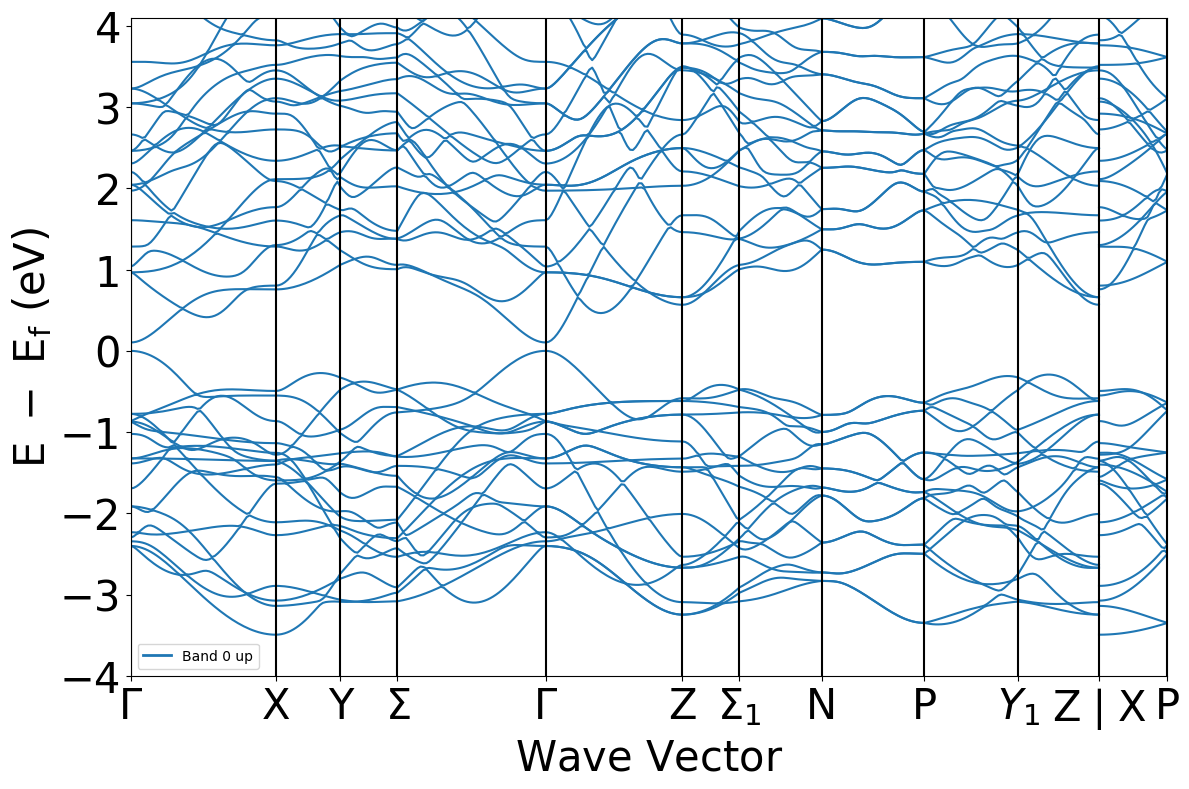

In [127]:
## Using BSPlotter function, plotting its band structure
plotter = BSPlotter(band_structure)
plot = plotter.get_plot()

In [ ]:
## Using BSPlotter function, plotting its band structure
plotter = XXXXX(XXXXX)
plot = plotter.XXXXX()

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pymatgen/electronic_structure/plotter.py:712: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


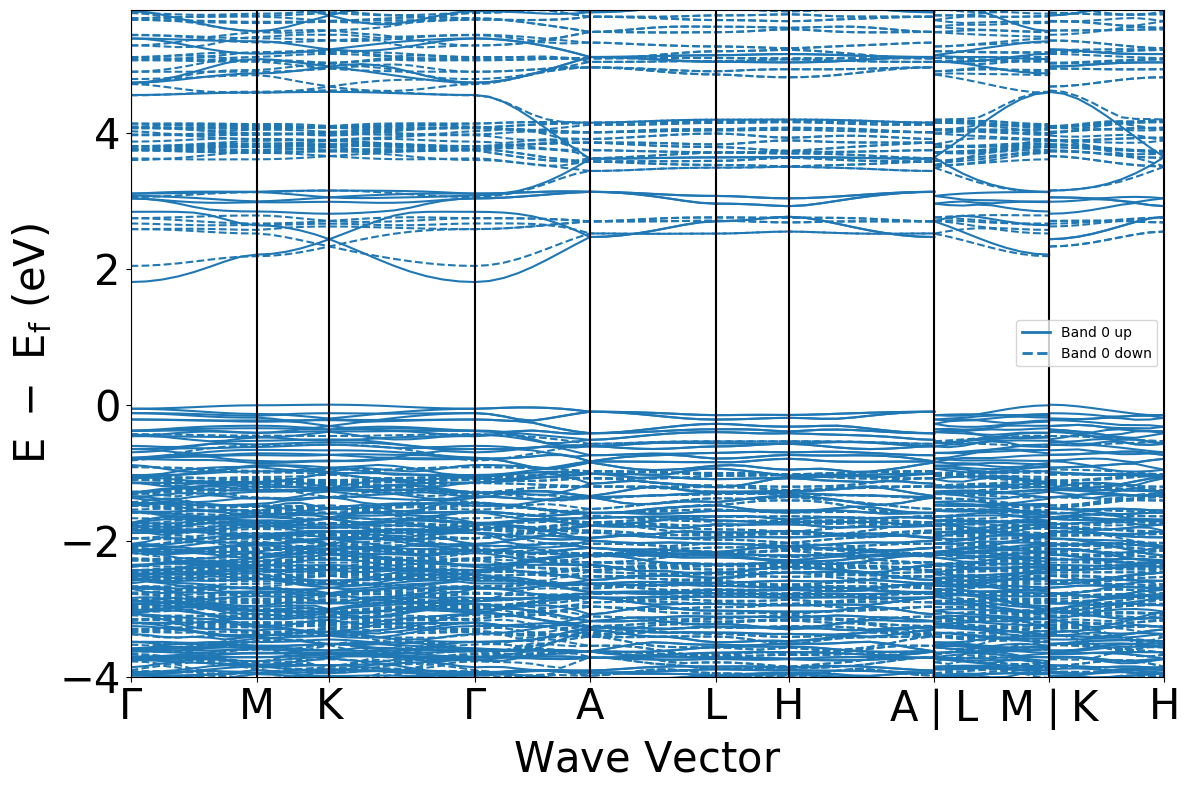

In [130]:
## More general procedure
## Check the band structure is the instance of BandStructureSymmLine class.
## If it is true, the code for plotting the band structure is proceeded.
band_structure = mpr.get_bandstructure_by_material_id("mp-560090")
if isinstance(band_structure, BandStructureSymmLine):
    plotter = BSPlotter(band_structure)
    plot = plotter.get_plot()
##    plt.show()
else:
    print("The band structure is not of type BandStructureSymmLine.")

Let's look at the phase diagram for Ni-Co-Mn

(This code was written with reference to the Jupyter notebook by Materials Virtual Lab(https://matgenb.materialsvirtuallab.org/))

In [131]:
## Loading functions for generating and plotting phase diagram from phase_diagram module of Pymatgen's analysis
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

In [132]:
# Querying all compounds in Ni-Ci-Mn compositional spaces using "get_entries_in_chemsys" function
entries = mpr.get_entries_in_chemsys(elements=["Ni", "Co", "Mn"], additional_criteria={"thermo_types": ["GGA_GGA+U"]})

Retrieving ThermoDoc documents:   0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
# Querying all compounds in Ni-Ci-Mn compositional spaces using "get_entries_in_chemsys" function
entries = mpr.XXXX(elements=[X,X,X], additional_criteria={"thermo_types": ["GGA_GGA+U"]})

In [133]:
# Construct phase diagram
pd = PhaseDiagram(entries)

In [ ]:
# Construct phase diagram
pd = XXXXX(entries)

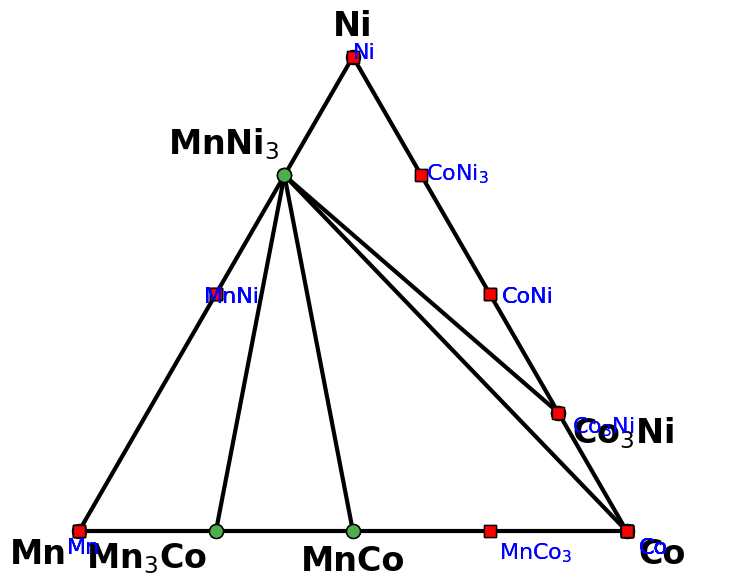

In [136]:
# Plot phase diagram
plotter = PDPlotter(pd, backend="matplotlib")
plotter.show()

In [ ]:
# Plot phase diagram
plotter = XXXX(pd, backend="matplotlib")
plotter.XXXX()